In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (make sure xy_data.csv is in the same directory)
df = pd.read_csv('xy_data.csv')
print("Data shape:", df.shape)
df.head()


Data shape: (1500, 2)


,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [8]:

# Define model and loss function

def model(params, t):
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)
    term = np.exp(M * np.abs(t)) * np.sin(0.3 * t)
    x = t * np.cos(theta) - term * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + term * np.cos(theta)
    return x, y

def l1_loss(params):
    theta_deg, M, X = params
    if not (0 < theta_deg < 50 and -0.05 < M < 0.05 and 0 < X < 100):
        return 1e9
    x_pred, y_pred = model(params, t_vals)
    return np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))


In [9]:

# Assume t is uniformly sampled between 6 and 60 since not provided
N = len(df)
t_vals = np.linspace(6.0, 60.0, N)
x_obs, y_obs = df['x'].values, df['y'].values

# Coarse grid search
thetas = np.linspace(1,50,25)
Ms = np.linspace(-0.05,0.05,19)
Xs = np.linspace(1,100,25)

best, best_loss = None, 1e18
for th in thetas:
    for M in Ms:
        for X in Xs[::5]:
            loss = l1_loss([th, M, X])
            if loss < best_loss:
                best_loss, best = loss, (th, M, X)
print("Coarse best guess:", best, "L1 loss:", best_loss)


Coarse best guess: (29.583333333333332, 0.022222222222222227, 62.875) L1 loss: 39539.44123983722


In [10]:

from scipy.optimize import minimize

res = minimize(l1_loss, best, method='Nelder-Mead', options={'maxiter':2000, 'xatol':1e-6, 'fatol':1e-6})
res_x = res.x
res_loss = l1_loss(res_x)
print("Optimized parameters:", res_x)
print("Final L1 loss:", res_loss)


Optimized parameters: [2.81184227e+01 2.13889547e-02 5.48994653e+01]
Final L1 loss: 37865.09383807801


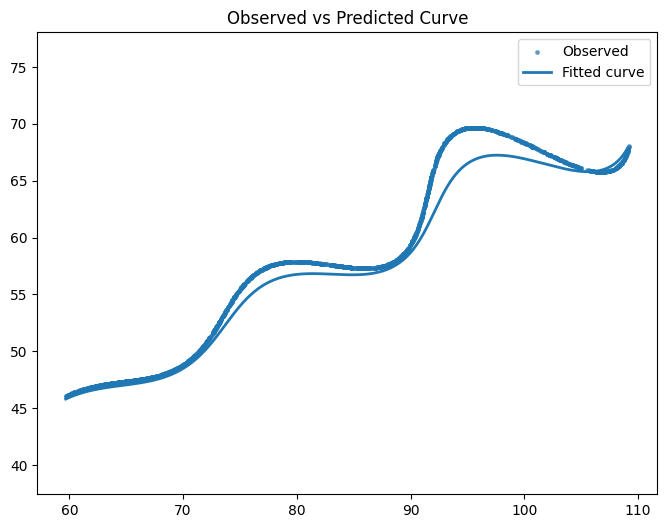

Best-fit parameters:
 θ = 28.11844938°
 M = 2.13890041e-02
 X = 54.90203959


In [6]:

x_pred, y_pred = model(res_x, t_vals)

plt.figure(figsize=(8,6))
plt.scatter(x_obs, y_obs, s=6, alpha=0.6, label='Observed')
plt.plot(x_pred, y_pred, '-', lw=2, label='Fitted curve')
plt.axis('equal')
plt.legend()
plt.title('Observed vs Predicted Curve')
plt.show()

print(f"Best-fit parameters:\n θ = {res_x[0]:.8f}°\n M = {res_x[1]:.8e}\n X = {res_x[2]:.8f}")
